In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import time
from datetime import datetime

import tensorflow as tf
from tensorflow.keras import layers
from glob import glob
import multiprocessing

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
os.chdir(os.getcwd()+'/cnn_results')

In [4]:
filenames = [filename for filename in os.listdir(os.getcwd()) if filename[-1] == '5']
print(filenames)

['alexnet.hdf5', 'effnetb0.hdf5', 'resnet50.hdf5', 'sevennet.hdf5', 'vgg16.hdf5']


In [41]:
filepath = filenames[4]
model = tf.keras.models.load_model(filepath)

In [42]:
img_height = 224
img_width = 224
batch_size = 32

path = "C:\\Users\\Szymon\\101_split"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_batches = train_datagen.flow_from_directory(
    path + '\\train',
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

valid_batches = valid_datagen.flow_from_directory(
    path + '\\val',
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

num_classes = len(np.unique(train_batches.classes))

Found 5724 images belonging to 97 classes.
Found 821 images belonging to 97 classes.


In [43]:
predictions = model.predict(valid_batches)
predictions = [np.argmax(x) for x in predictions]
actuals = valid_batches.labels
conf_mat = tf.math.confusion_matrix(actuals, predictions)

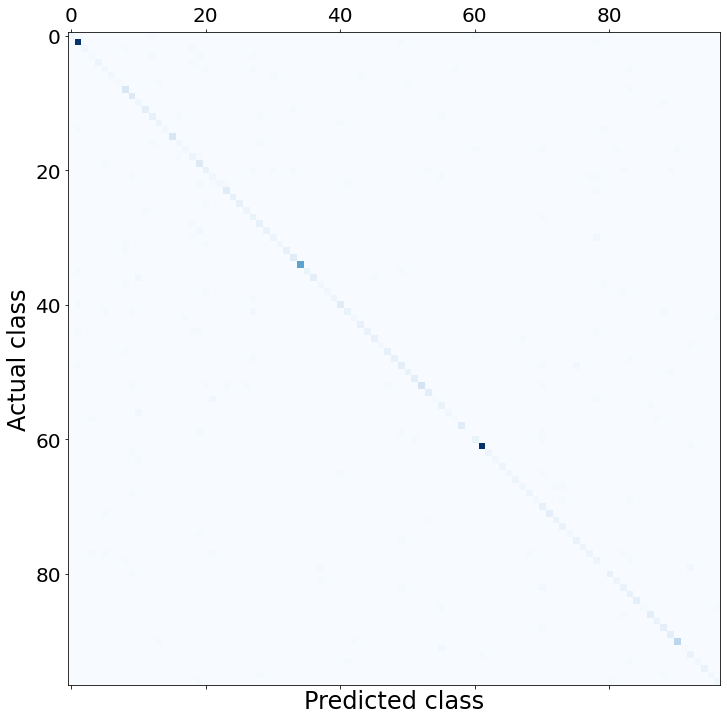

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.matshow(conf_mat.numpy(), cmap = 'Blues')
plt.xlabel('Predicted class', fontsize=24)
plt.ylabel('Actual class', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('conf_mat.png')

In [45]:
precision = np.diag(conf_mat) / np.sum(conf_mat, axis=1)
recall = np.diag(conf_mat) / np.sum(conf_mat, axis=0)

recall = np.where(np.isfinite(recall), recall, 0)

f1score = 2 * (precision * recall) / (precision + recall)
f1score = np.where(np.isfinite(f1score), f1score, 0)

C:\Users\Szymon\AppData\Local\Temp\ipykernel_10608\633328498.py:2: RuntimeWarning: invalid value encountered in true_divide
  recall = np.diag(conf_mat) / np.sum(conf_mat, axis=0)
C:\Users\Szymon\AppData\Local\Temp\ipykernel_10608\633328498.py:6: RuntimeWarning: invalid value encountered in true_divide
  f1score = 2 * (precision * recall) / (precision + recall)


In [46]:
pprint([['precision', np.mean(precision)],['recall', np.mean(recall)],['f1score', np.mean(f1score)]])

[['precision', 0.7159619733073341],
 ['recall', 0.7967782903829514],
 ['f1score', 0.7254239762179002]]
